In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [29]:
# loading datasets
df_hyundai = pd.read_csv('hyundai.csv')
df_merc = pd.read_csv('merc.csv')

In [30]:
df_hyundai.head()

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0


In [31]:
df_merc.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [32]:
print("describe for hyundai:\n", df_hyundai.describe(), "\n")
print("describe for mercedes:\n", df_merc.describe())

describe for hyundai:
               year        price        mileage       tax(£)          mpg  \
count  4860.000000   4860.00000    4860.000000  4860.000000  4860.000000   
mean   2017.107613  12750.13107   21486.049588   121.147119    53.827798   
std       1.920456   5992.92231   17710.196964    58.003289    12.736042   
min    2000.000000   1200.00000       1.000000     0.000000     1.100000   
25%    2016.000000   8000.00000    8339.250000   125.000000    44.800000   
50%    2017.000000  11990.00000   17462.000000   145.000000    55.400000   
75%    2019.000000  15733.75000   30967.000000   145.000000    60.100000   
max    2020.000000  92000.00000  138000.000000   555.000000   256.800000   

        engineSize  
count  4860.000000  
mean      1.457922  
std       0.400788  
min       0.000000  
25%       1.200000  
50%       1.600000  
75%       1.700000  
max       2.900000   

describe for mercedes:
                year          price        mileage           tax           mpg

In [33]:
print("model for mercedes:\n", df_merc["model"].value_counts(), "\n")
print("model for hyundai:\n", df_hyundai["model"].value_counts())

model for mercedes:
 model
 C Class      3747
 A Class      2561
 E Class      1953
 GLC Class     960
 GLA Class     847
 B Class       591
 CL Class      511
 GLE Class     461
 SL CLASS      260
 CLS Class     237
 V Class       207
 S Class       197
 GL Class      121
 SLK            95
 CLA Class      86
 X-CLASS        82
 M Class        79
 GLS Class      74
 GLB Class      19
 G Class        15
 CLK             7
 CLC Class       3
 R Class         2
180              1
230              1
220              1
200              1
Name: count, dtype: int64 

model for hyundai:
 model
Tucson      1300
I10         1092
I30          536
I20          496
Kona         328
Ioniq        284
Santa Fe     245
IX20         204
I40          127
IX35         118
I800         117
Getz           6
Veloster       3
Terracan       2
Accent         1
Amica          1
Name: count, dtype: int64


In [34]:
print("types for hyundai:\n", df_hyundai.dtypes, "\n")
print("types for mercedes:\n", df_merc.dtypes)

types for hyundai:
 model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax(£)            int64
mpg             float64
engineSize      float64
dtype: object 

types for mercedes:
 model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object


In [35]:
df_hyundai.rename(columns={"tax(£)" : "tax"}, inplace = True)

In [36]:
print("NaN values for hyundai:\n", df_hyundai.isnull().sum(), "\n")
print("NaN values for mercedes:\n", df_merc.isnull().sum(), "\n")

NaN values for hyundai:
 model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64 

NaN values for mercedes:
 model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64 



In [37]:
df_hyundai["brand"] = "Hyundai"
df_merc["brand"] = "Mercedes"
df_cars = pd.concat([df_hyundai, df_merc], ignore_index = True)

In [38]:
df_cars['age'] = 2025 - df_cars['year']
df_cars.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,age
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2,Hyundai,8
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0,Hyundai,9
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7,Hyundai,9
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0,Hyundai,9
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0,Hyundai,10


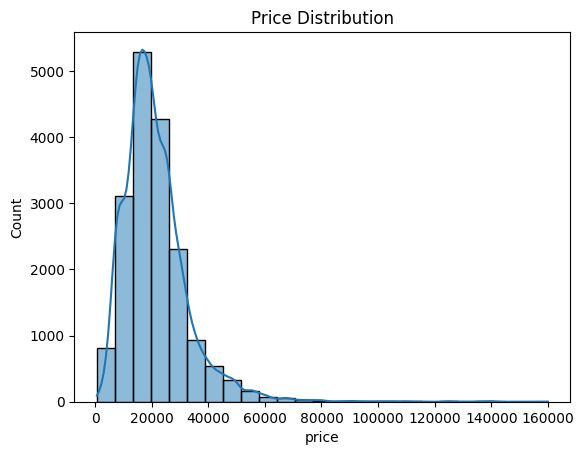

In [39]:
# Distribution of price
sns.histplot(df_cars['price'], bins=25, kde=True)
plt.title("Price Distribution")
plt.show()

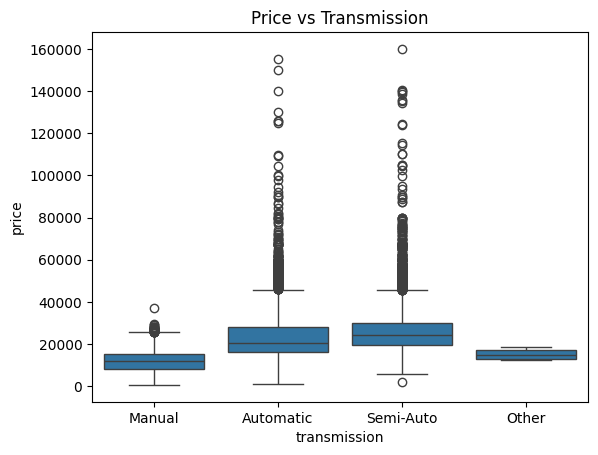

In [40]:
# Boxplot - Price by transmission
sns.boxplot(x='transmission', y='price', data=df_cars)
plt.title("Price vs Transmission")
plt.show()

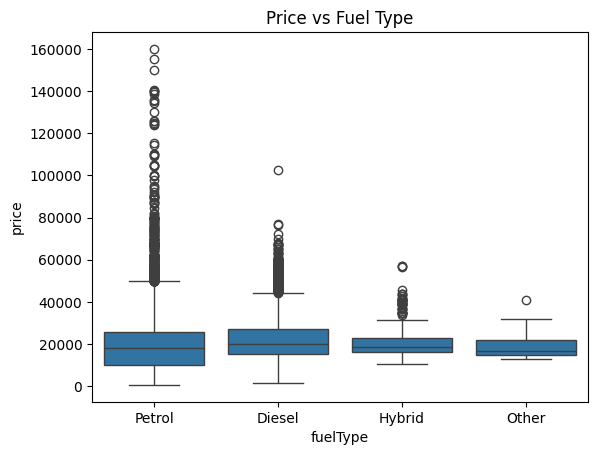

In [41]:
# Boxplot - Price by fuel type
sns.boxplot(x='fuelType', y='price', data=df_cars)
plt.title("Price vs Fuel Type")
plt.show()

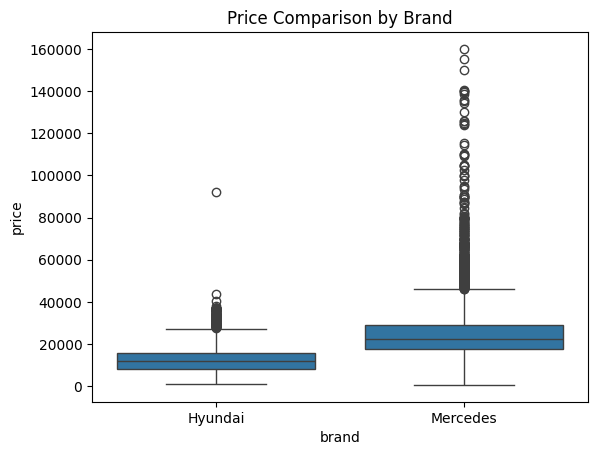

In [42]:
# Boxplot - Price by brand
sns.boxplot(x='brand', y='price', data=df_cars)
plt.title("Price Comparison by Brand")
plt.show()

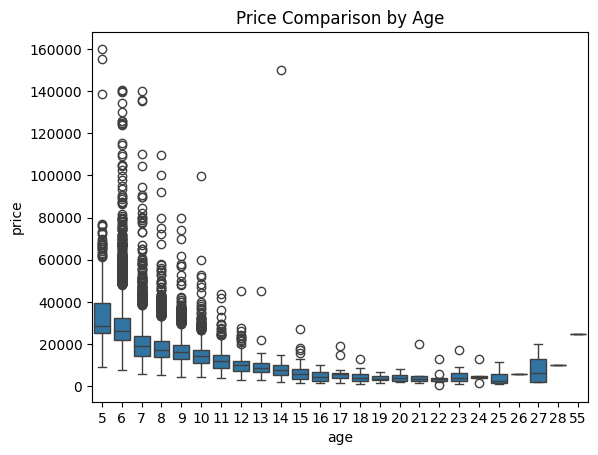

In [43]:
# Boxplot - Price by age
sns.boxplot(x='age', y='price', data=df_cars)
plt.title("Price Comparison by Age")
plt.show()

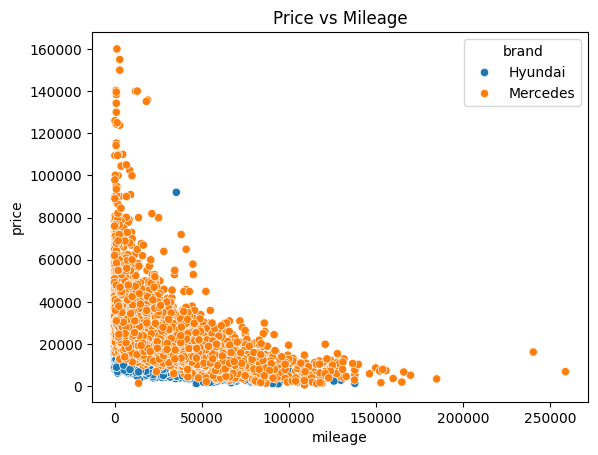

In [44]:
# Scatterplot - Price vs Mileage
sns.scatterplot(x='mileage', y='price', hue='brand', data=df_cars)
plt.title("Price vs Mileage")
plt.show()

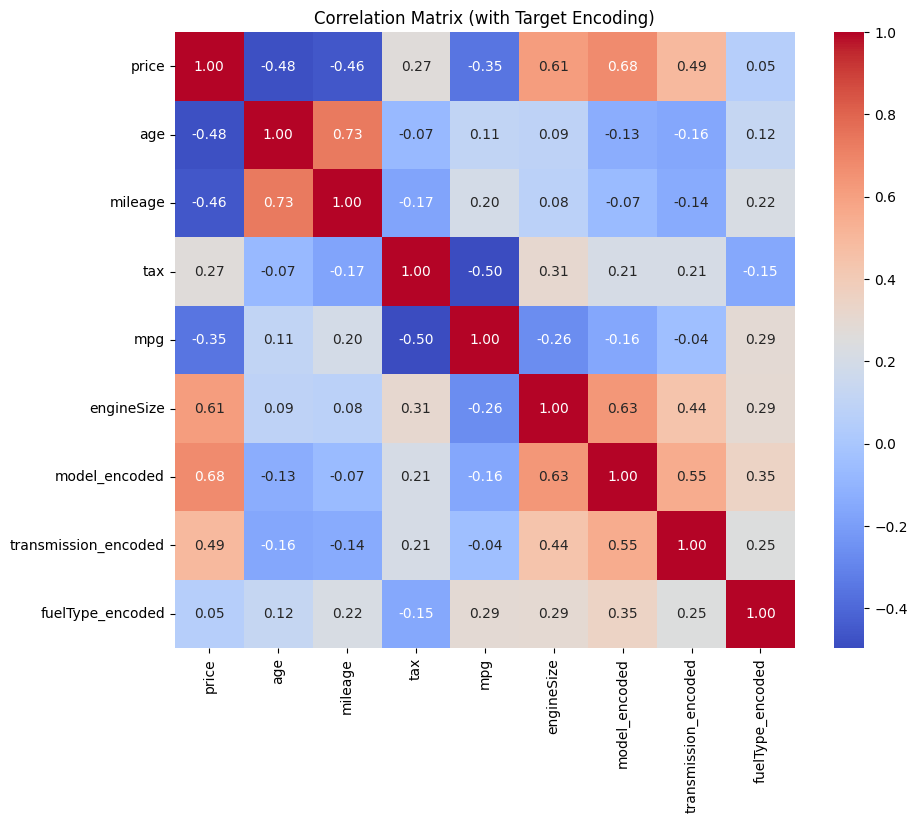

In [45]:
# target encoding converts each category to price average → becomes numeric,
# enters directly into the correlation matrix.
df_eda = df_cars.copy()
df_eda["model_encoded"] = df_eda.groupby("model")["price"].transform("mean")
df_eda["transmission_encoded"] = df_eda.groupby("transmission")["price"].transform("mean")
df_eda["fuelType_encoded"] = df_eda.groupby("fuelType")["price"].transform("mean")

# use columns that contain numeric data for correlation matrix
corr_columns = ["price", "age", "mileage", "tax", "mpg", "engineSize",
                "model_encoded", "transmission_encoded", "fuelType_encoded"]
correlation_matrix = df_eda[corr_columns].corr()

# visualization of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (with Target Encoding)")
plt.show()

In [46]:
# Does transmission type affect average price?
auto_prices = df_cars[df_cars['transmission'] == 'Automatic']['price']
manual_prices = df_cars[df_cars['transmission'] == 'Manual']['price']

# T-test
t_stat, p_value = stats.ttest_ind(auto_prices, manual_prices, equal_var=False)
print("T-test Results: Transmission vs Price")
print(f"t-statistic: {t_stat:.2f}, p-value: {p_value}")

if p_value < 0.05:
    print("There is a price difference between automatic and manual cars (reject H0).")
else:
    print("There is no price difference between automatic and manual cars (fail to reject H0).")


T-test Results: Transmission vs Price
t-statistic: 62.12, p-value: 0.0
There is a price difference between automatic and manual cars (reject H0).


In [47]:
# Does fuel type affect average price?
petrol_prices = df_cars[df_cars['fuelType'] == 'Petrol']['price']
diesel_prices = df_cars[df_cars['fuelType'] == 'Diesel']['price']

# T-test
t_stat, p_value = stats.ttest_ind(petrol_prices, diesel_prices, equal_var=False)
print("T-test Results: Fuel Type vs Price")
print(f"t-statistic: {t_stat:.2f}, p-value: {p_value}")

if p_value < 0.05:
    print("There is a price difference between petrol and diesel cars (reject H0).")
else:
    print("There is no price difference between petrol and diesel cars (fail to reject H0).")

T-test Results: Fuel Type vs Price
t-statistic: -6.17, p-value: 6.882688816088018e-10
There is a price difference between petrol and diesel cars (reject H0).


In [48]:
# Does brand affect average price?
merc_prices = df_cars[df_cars['brand'] == 'Mercedes']['price']
hyundai_prices = df_cars[df_cars['brand'] == 'Hyundai']['price']

# T-test
t_stat, p_value = stats.ttest_ind(merc_prices, hyundai_prices, equal_var=False)
print("T-test Results: Brand vs Price")
print(f"t-statistic: {t_stat}, p-value: {p_value}")

if p_value < 0.05:
    print("There is a price difference between hyundai and mercedes cars (reject H0).")
else:
    print("There is no price difference between hyundai and mercedes cars (fail to reject H0).")

T-test Results: Brand vs Price
t-statistic: 88.86021429153533, p-value: 0.0
There is a price difference between hyundai and mercedes cars (reject H0).


In [49]:
new_cars = df_cars[df_cars['year'] >= 2020]['price']
old_cars = df_cars[df_cars['year'] < 2020]['price']

t_stat, p_value = stats.ttest_ind(new_cars, old_cars, equal_var=False)
print("T-test: New cars (>=2020) vs Old cars (<2020)")
print(f"t-statistic: {t_stat:.2f}, p-value: {p_value}")

if p_value < 0.05:
    print("There is a price difference between old and new cars (reject H0).")
else:
    print("There is no price difference between old and new cars (fail to reject H0).")

T-test: New cars (>=2020) vs Old cars (<2020)
t-statistic: 24.43, p-value: 2.128803126157875e-102
There is a price difference between old and new cars (reject H0).


In [50]:
low_mileage = df_cars[df_cars['mileage'] < 20000]['price']
high_mileage = df_cars[df_cars['mileage'] >= 20000]['price']

t_stat, p_value = stats.ttest_ind(low_mileage, high_mileage, equal_var=False)
print("T-test: Low mileage (<20k) vs High mileage (>=20k)")
print(f"t-statistic: {t_stat:.2f}, p-value: {p_value}")

if p_value < 0.05:
    print("There is a price difference between low and high mileage cars (reject H0).")
else:
    print("There is no price difference between low and high mileage cars (fail to reject H0).")

T-test: Low mileage (<20k) vs High mileage (>=20k)
t-statistic: 66.14, p-value: 0.0
There is a price difference between low and high mileage cars (reject H0).


In [51]:
high_mpg = df_cars[df_cars['mpg'] >= 50]['price']
low_mpg = df_cars[df_cars['mpg'] < 50]['price']

t_stat, p_value = stats.ttest_ind(high_mpg, low_mpg, equal_var=False)
print("T-test: High mpg (>=50) vs Low mpg (<50)")
print(f"t-statistic: {t_stat:.2f}, p-value: {p_value}")

if p_value < 0.05:
    print("There is a price difference between low and high mpg cars (reject H0).")
else:
    print("There is no price difference between low and high mpg cars (fail to reject H0).")

T-test: High mpg (>=50) vs Low mpg (<50)
t-statistic: -46.28, p-value: 0.0
There is a price difference between low and high mpg cars (reject H0).


In [52]:
large_engine = df_cars[df_cars['engineSize'] >= 2.0]['price']
small_engine = df_cars[df_cars['engineSize'] < 2.0]['price']

t_stat, p_value = stats.ttest_ind(large_engine, small_engine, equal_var=False)
print("T-test: Large engine (>=2.0L) vs Small engine (<2.0L)")
print(f"t-statistic: {t_stat:.2f}, p-value: {p_value}")

if p_value < 0.05:
    print("There is a price difference between small and large engine size cars (reject H0).")
else:
    print("There is no price difference between small and large engine size cars (fail to reject H0).")

T-test: Large engine (>=2.0L) vs Small engine (<2.0L)
t-statistic: 72.37, p-value: 0.0
There is a price difference between small and large engine size cars (reject H0).
